# Radiometers Lab

### Step 1: 

Read in and plot Total (or Global), direct normal, and diffuse irradiances from the SOLRAD site (Seattle) for the major wildfire event (2020).

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%config InlineBackend.figure_format='retina'

In [13]:
doys = np.arange(1, 366, 1)
data = pd.DataFrame()

for doy in doys:
    fn = f'data/sea20{doy.astype(int).astype(str).zfill(3)}.dat'
    data_i = pd.read_table(fn, skiprows = 2, delimiter = '\s+', header = None, engine = 'python',
                          names = ['year', 'jday', 'month', 'day', 
                                   'hour', 'min', 'dt', 'zen', 'dw_psp',
                                   'qc_dwpsp', 'direct', 'qc_direct', 'diffuse', 
                                   'qc_diffuse', 'uvb', 'qc_uvb', 
                                   'uvb_temp', 'qc_uvb_temp', 'std_dw_psp', 
                                   'std_direct', 'std_diffuse', 'std_uvb'])
    data = pd.concat([data, data_i])

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_66729/3285203947.py:6: SyntaxWarning: invalid escape sequence '\s'
  data_i = pd.read_table(fn, skiprows = 2, delimiter = '\s+', header = None, engine = 'python',


### Step 2:

Calculate the **total irradiance (component sum)** from the **direct normal (DNI)** and **diffuse (DHI)** irradiance measurements.

$$ SUM = DNI \times \cos(SZA) + DHI $$

SZA = solar zenith angle.

In [17]:
data = data[(data.qc_direct == 0) & (data.qc_diffuse == 0) & (data.qc_dwpsp == 0)] # Quality checks
data['time'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str) + '-' + data['day'].astype(str) + ' ' + data['hour'].astype(str) + ':' + data['min'].astype(str))
data['sum'] = data['diffuse'] + data['direct'] * np.cos(np.deg2rad(data['zen']))

### Step 3:

Take the difference between measured **total** and calculated **component sum** and plot.

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_66729/2909698047.py:5: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_66729/2909698047.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


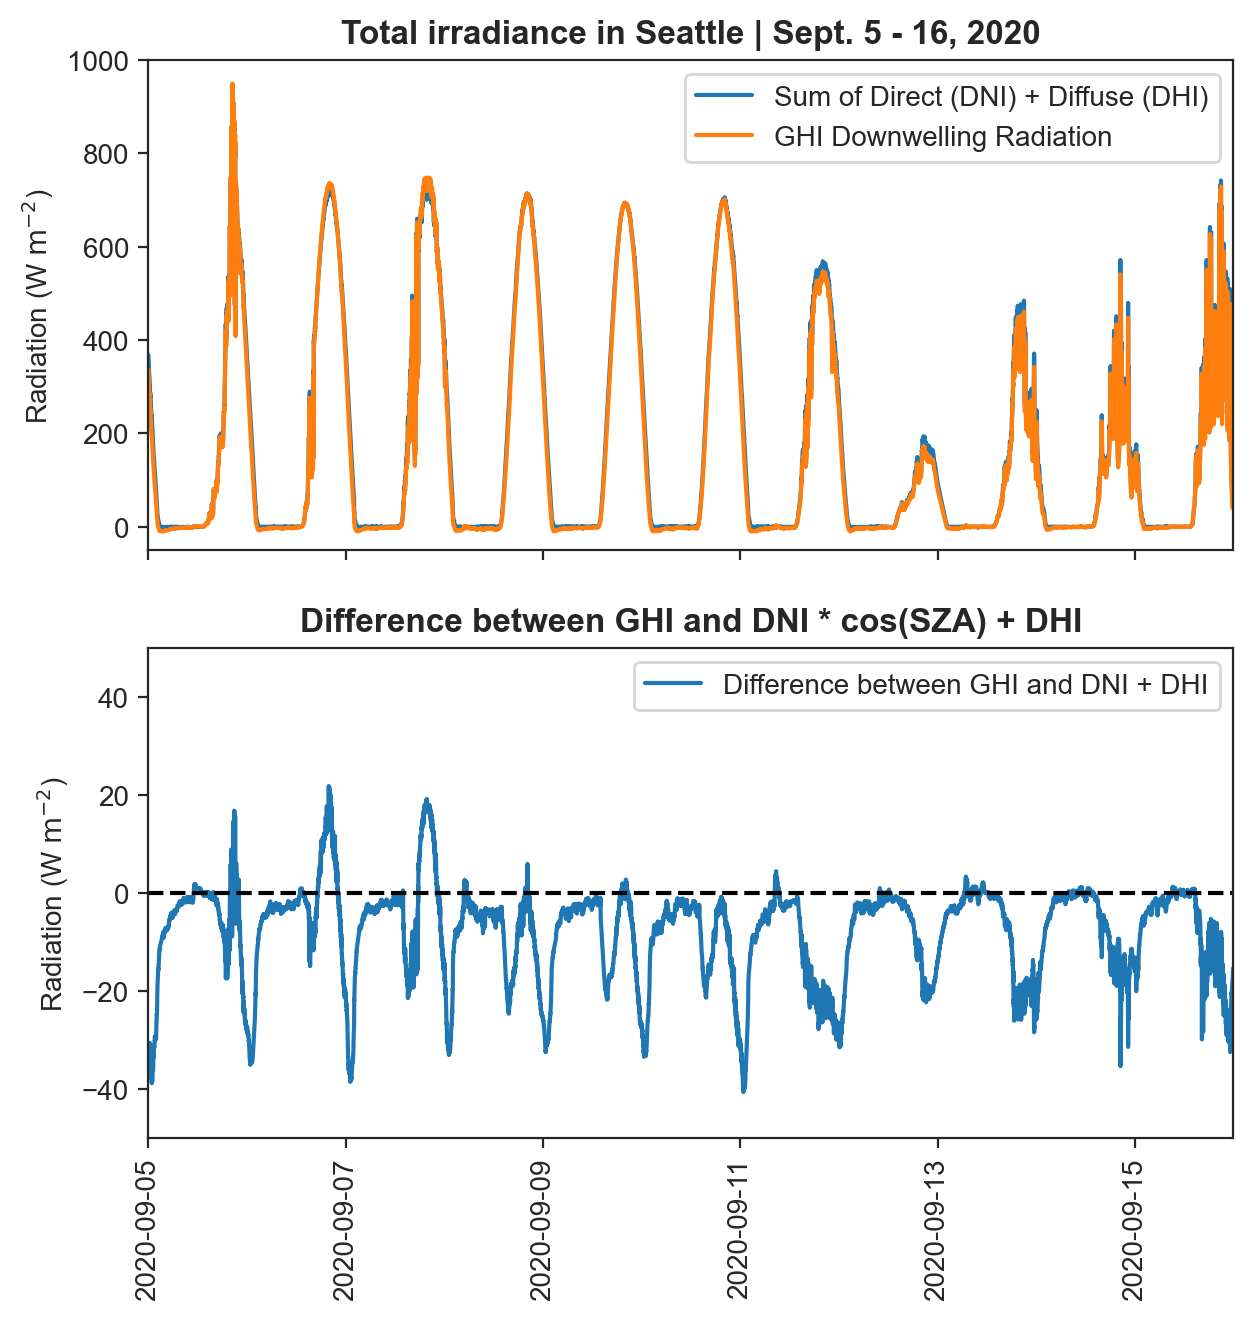

In [26]:
fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize = (7,7))
ax.plot(data['time'], data['sum'], label = 'Sum of Direct (DNI) + Diffuse (DHI)')
ax.plot(data['time'], data['dw_psp'], label = 'GHI Downwelling Radiation')
plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax.set_title('Total irradiance in Seattle | Sept. 5 - 16, 2020', weight = 'bold')

ax2.plot(data['time'], data['dw_psp'] - data['sum'], label = 'Difference between GHI and DNI + DHI')
ax2.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax2.set_title('Difference between GHI and DNI * cos(SZA) + DHI', weight = 'bold')
ax2.axhline(0, ls = 'dashed', color = 'black')
ax2.legend()

ax.set_xlim([pd.to_datetime('2020-09-05'), pd.to_datetime('2020-09-16')])
ax.set_ylim([-50, 1000])
ax2.set_ylim([-50, 50])
ax.legend()

### Step 4: 

Examine the observed difference as a function of daytime, day (clean, polluted).

### Step 5:

Discuss potential reasons of the obtained difference.

---
 
They are two instruments -- there is no guarantee that they will always match (like a model). Perhaps also uncertainties.

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_66729/630888812.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_66729/630888812.py:10: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


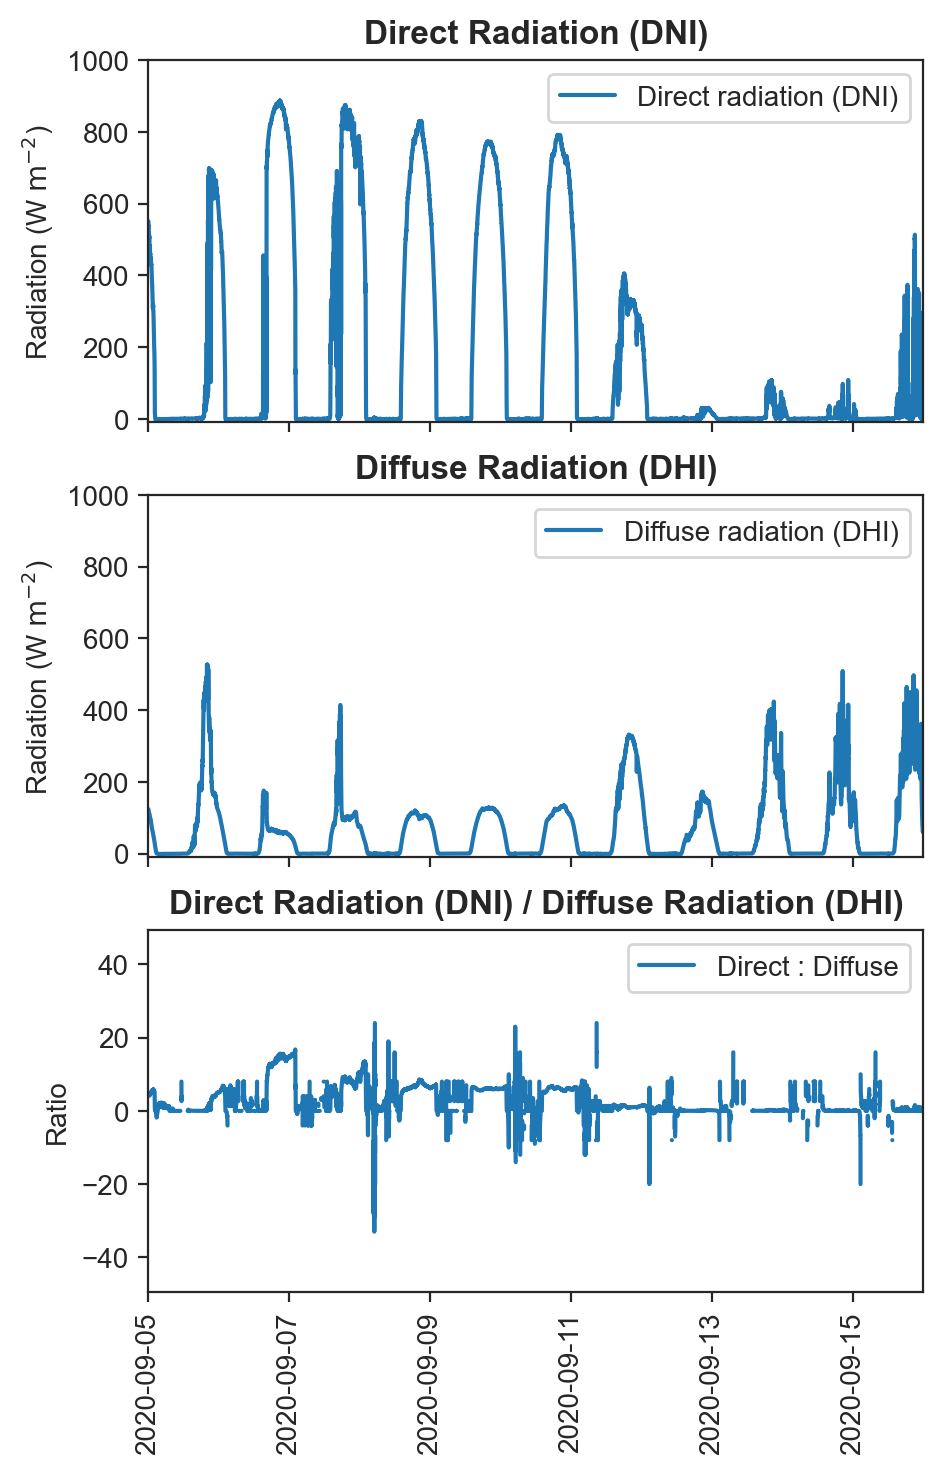

In [45]:
fig, (ax, ax2, ax3) = plt.subplots(3,1, sharex = True, figsize = (5,8))

ax.plot(data['time'], data['direct'], label = 'Direct radiation (DNI)')
ax2.plot(data['time'], data['diffuse'], label = 'Diffuse radiation (DHI)')
ax3.plot(data['time'], data['direct'] / data['diffuse'], label = 'Direct : Diffuse')

plt.xticks(rotation = 90)

ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax2.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax3.set_ylabel('Ratio')

ax.set_title('Direct Radiation (DNI)', weight = 'bold')
ax2.set_title('Diffuse Radiation (DHI)', weight = 'bold')
ax3.set_title('Direct Radiation (DNI) / Diffuse Radiation (DHI)', weight = 'bold')

ax.set_xlim([pd.to_datetime('2020-09-05'), pd.to_datetime('2020-09-16')])
ax.set_ylim([-10, 1000])
ax2.set_ylim([-10, 1000])

ax.legend()
ax2.legend()
ax3.legend()

#### Investigating time of day

In [46]:
night = data[(data['hour'] >= 4) & (data.hour <= 11)]
morning = data[(data['hour'] >= 12) & (data.hour <= 19)]
afternoon = data[(data['hour'] >= 19) | (data['hour'] <= 3)]

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_66729/457421828.py:13: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_66729/457421828.py:14: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_66729/457421828.py:15: SyntaxWarning: invalid escape sequence '\m'
  ax3.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


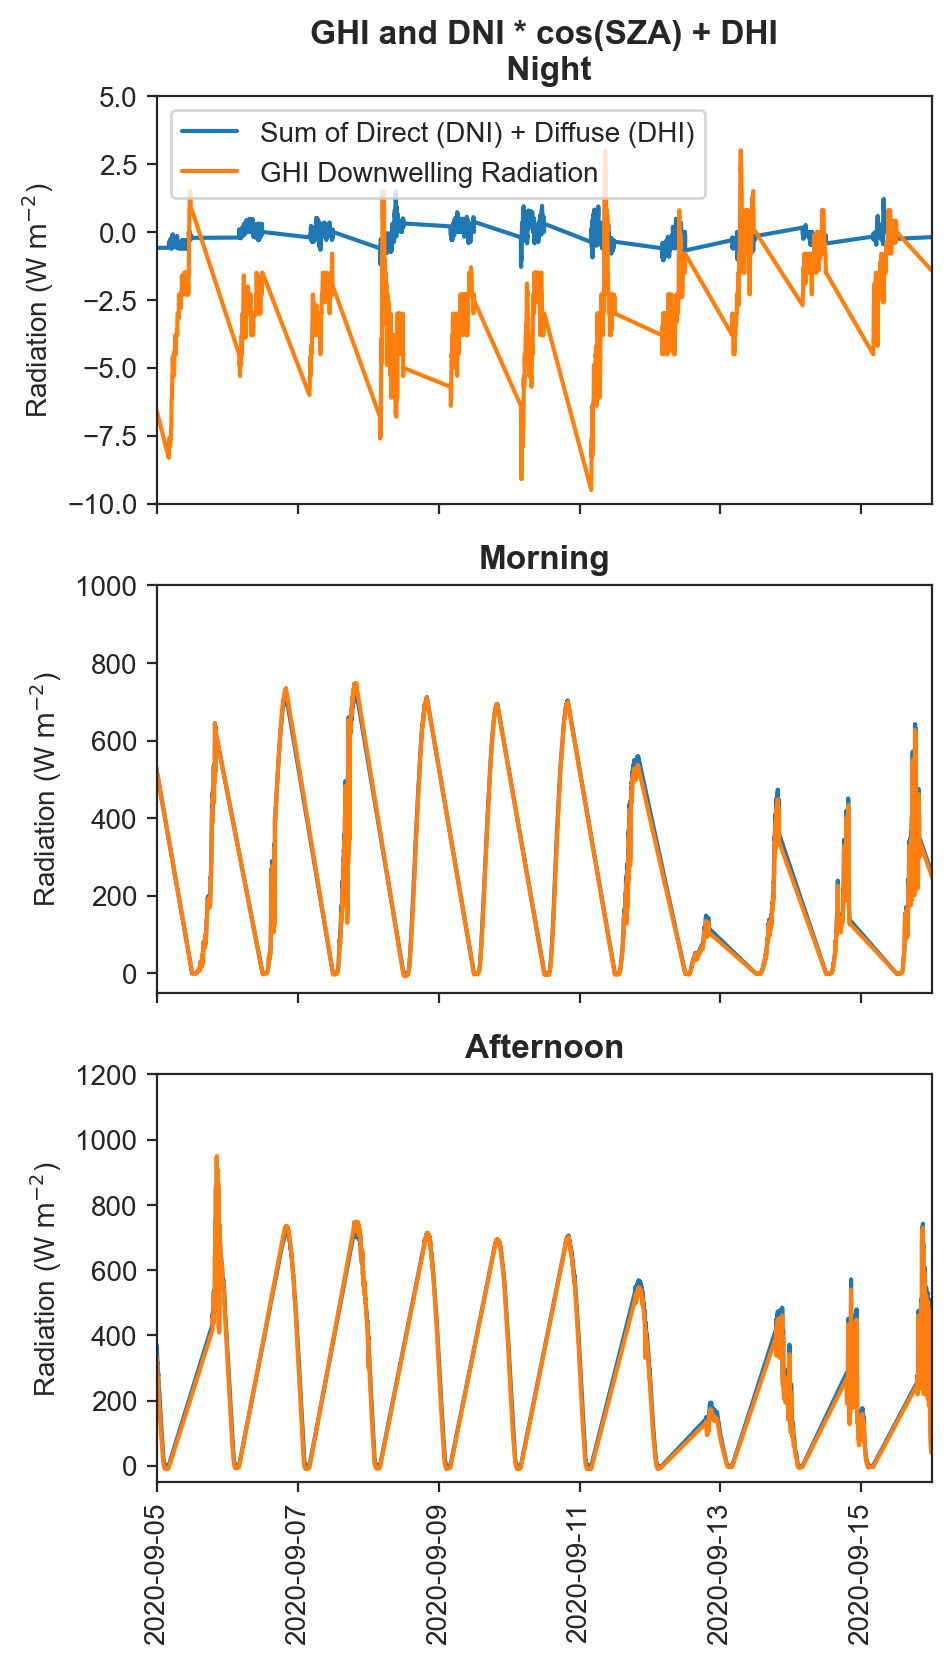

In [69]:
fig, (ax, ax2, ax3) = plt.subplots(3,1, sharex = True, figsize = (5,9))

ax.plot(night['time'], night['sum'], label = 'Sum of Direct (DNI) + Diffuse (DHI)')
ax.plot(night['time'], night['dw_psp'], label = 'GHI Downwelling Radiation')

ax2.plot(morning['time'], morning['sum'], label = 'Sum of Direct (DNI) + Diffuse (DHI)')
ax2.plot(morning['time'], morning['dw_psp'], label = 'GHI Downwelling Radiation')

ax3.plot(afternoon['time'], afternoon['sum'], label = 'Sum of Direct (DNI) + Diffuse (DHI)')
ax3.plot(afternoon['time'], afternoon['dw_psp'], label = 'GHI Downwelling Radiation')

plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax2.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax3.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')

ax.set_title('GHI and DNI * cos(SZA) + DHI\n Night', weight = 'bold')
ax2.set_title('Morning', weight = 'bold')
ax3.set_title('Afternoon', weight = 'bold')

ax.set_ylim([-10, 5])
ax2.set_ylim([-50, 1000])
ax3.set_ylim([-50, 1200])

ax.set_xlim([pd.to_datetime('2020-09-05'), pd.to_datetime('2020-09-16')])

ax.legend()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_66729/310743756.py:12: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')


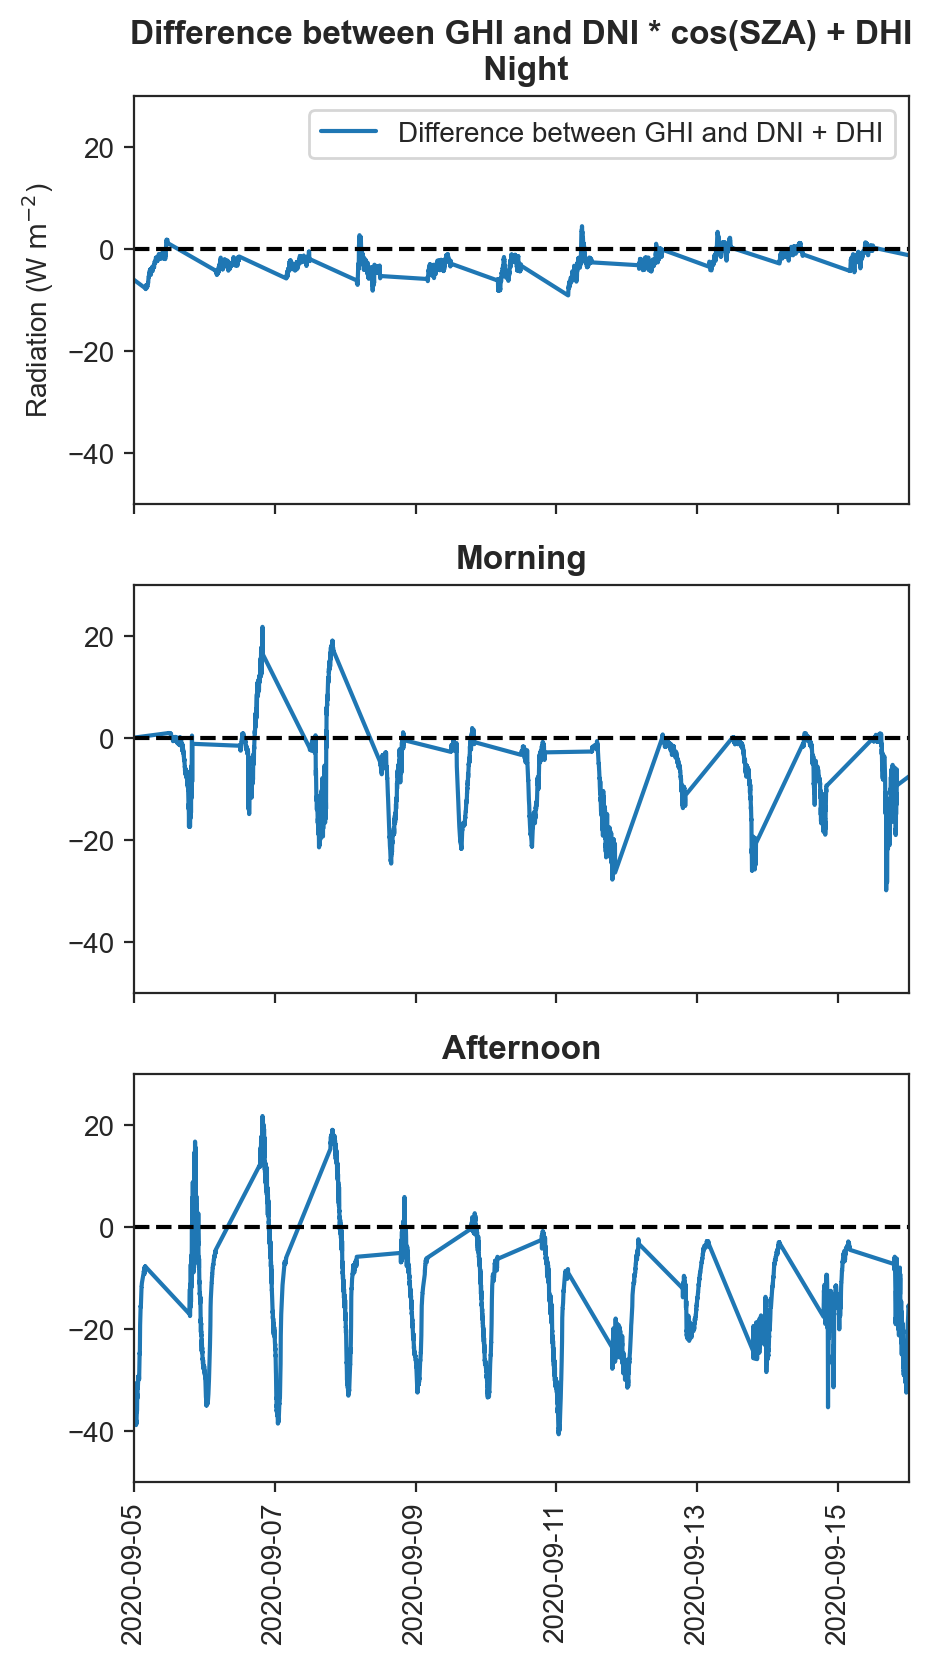

In [59]:
fig, (ax, ax2, ax3) = plt.subplots(3,1, sharex = True, sharey = True, figsize = (5,9))
ax.plot(night['time'], night['dw_psp'] - night['sum'], label = 'Difference between GHI and DNI + DHI')
ax.axhline(0, ls = 'dashed', color = 'black')

ax2.plot(morning['time'], morning['dw_psp'] - morning['sum'], label = 'Difference between GHI and DNI + DHI')
ax2.axhline(0, ls = 'dashed', color = 'black')

ax3.plot(afternoon['time'], afternoon['dw_psp'] - afternoon['sum'], label = 'Difference between GHI and DNI + DHI')
ax3.axhline(0, ls = 'dashed', color = 'black')

plt.xticks(rotation = 90)
ax.set_ylabel('Radiation (W $\mathrm{m^{-2}}$)')
ax.set_title('Difference between GHI and DNI * cos(SZA) + DHI\n Night', weight = 'bold')
ax2.set_title('Morning', weight = 'bold')
ax3.set_title('Afternoon', weight = 'bold')

ax.set_ylim([-50, 30])
ax.set_xlim([pd.to_datetime('2020-09-05'), pd.to_datetime('2020-09-16')])

ax.legend()